<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/Progress%202_Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deteksi Wajah Berbasis Segmentasi Kulit**


In [1]:
# import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### **Metode Segmentasi Kulit Berdasarkan Ruang Warna Ycrcb**

Metode segmentasi kulit berdasarkan ruang warna YCrCb digunakan untuk memisahkan area kulit dari citra berdasarkan karakteristik warna dalam ruang warna tersebut. Ruang warna YCrCb terdiri dari tiga komponen:
**Y (luminance), Cr (red difference), dan Cb (blue difference).**

In [3]:
def skin_segmentation(image):
    # Mengubah citra menjadi ruang warna YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Menginisialisasi batas atas dan batas bawah untuk deteksi kulit
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    # Menerapkan mask untuk mendapatkan area kulit
    skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

    # Mengaplikasikan operasi morfologi untuk memperbaiki segmentasi kulit
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=1)

    # Menggabungkan mask dengan citra asli
    segmented = cv2.bitwise_and(image, image, mask=skin_mask)

    return segmented

In [4]:
def convert_to_grayscale(image):
    # Mengubah citra menjadi keabuan
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return grayscale

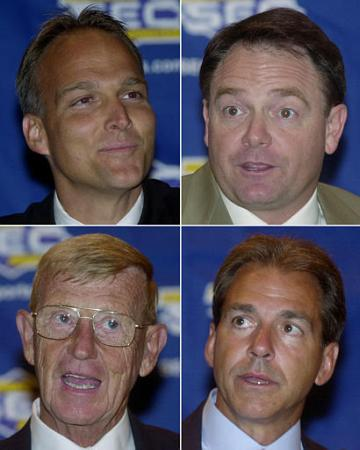

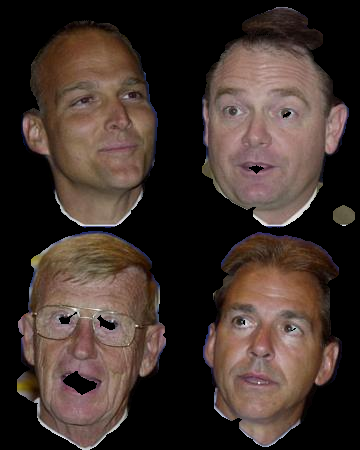

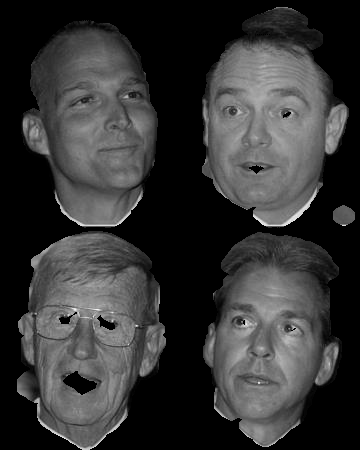

In [11]:
# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/30/big/img_272.jpg')

# Melakukan segmentasi kulit
skin_segmented_image = skin_segmentation(image)

# Mengubah citra segmentasi kulit menjadi citra keabuan
grayscale_image = convert_to_grayscale(skin_segmented_image)

# Menampilkan citra asli
cv2_imshow(image)

# Menampilkan citra segmentasi kulit
cv2_imshow(skin_segmented_image)

# Menampilkan citra keabuan
cv2_imshow(grayscale_image)

### **Deteksi Kontur Menggunakan Thresholding Dan Analisis Luas Kontur Untuk Mengidentifikasi Wajah.**

Tujuannya adalah untuk mendeteksi dan mengidentifikasi kontur yang memenuhi syarat sebagai wajah berdasarkan luas kontur.

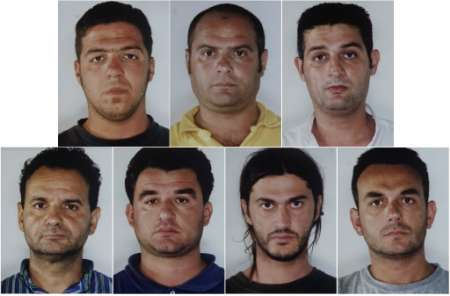

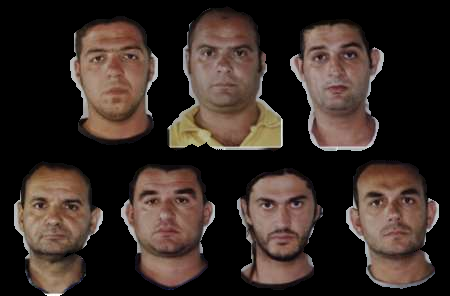

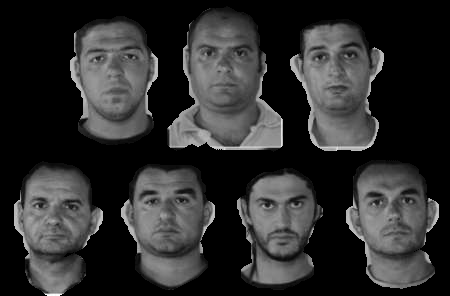

In [12]:
def find_face_contours(image):
    # Mengkonversi citra ke dalam citra biner
    ret, threshold = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    # Mencari kontur pada citra biner
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Membuat list untuk menyimpan kontur wajah
    face_contours = []

    # Mengiterasi setiap kontur yang ditemukan
    for contour in contours:
        # Menghitung luas kontur
        area = cv2.contourArea(contour)

        # Mengecek apakah kontur memenuhi syarat sebagai wajah
        if area > 500:  # Sesuaikan ambang batas sesuai kebutuhan
            # Menambahkan kontur wajah ke dalam list
            face_contours.append(contour)

    return face_contours

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/30/big/img_1019.jpg')

# Melakukan segmentasi kulit
skin_segmented_image = skin_segmentation(image)

# Mendapatkan citra mask kulit
skin_mask = cv2.cvtColor(skin_segmented_image, cv2.COLOR_BGR2GRAY)

# Mengubah citra segmentasi kulit menjadi citra keabuan
grayscale_image = convert_to_grayscale(skin_segmented_image)

# Mencari kontur wajah
face_contours = find_face_contours(grayscale_image)

# Menampilkan citra asli
cv2_imshow(image)

# Menampilkan citra segmentasi kulit
cv2_imshow(skin_segmented_image)

# Menampilkan citra keabuan
cv2_imshow(grayscale_image)


**Segmentasi menggunakan metode template matching**

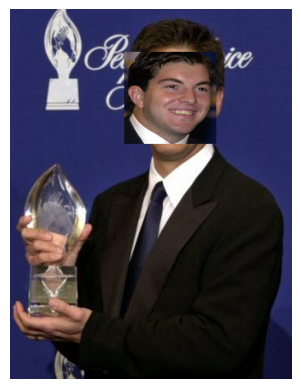

In [ ]:
# Inisialisasi detektor wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/fitur-facedet/haarcascade_frontalface_alt.xml')

# Baca gambar
image_ori = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/31/big/img_123.jpg')
image_grey = cv2.cvtColor(image_ori, cv2.COLOR_BGR2GRAY)
image_blur = image_grey.copy()

# Deteksi wajah
fd_image = cascade_wajah.detectMultiScale(image_blur)

# Mendapatkan gambar "smile.png"
smile_img = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/31/big/img_670.jpg', cv2.IMREAD_UNCHANGED)

# Menindih bagian wajah dengan gambar "smile.png"
for (x, y, w, h) in fd_image:
    # Mengubah ukuran gambar "smile.png" sesuai dengan ukuran wajah
    resized_smile = cv2.resize(smile_img, (w, h))
    # Menindih gambar "smile.png" ke dalam gambar "image_ori"
    image_ori[y:y+h, x:x+w] = resized_smile

# Tampilkan gambar asli dengan bagian wajah ditindih smile
plt.imshow(cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()